# FAKE NEWS DETECTION

In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer 
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load train data
pd.set_option('display.max_colwidth',None)
df=pd.read_csv('F:/Data Trained/projects/fake news project/Fake news project/train_news.csv')
df.head()

Unnamed: 0     id  \
0           0   9653   
1           1  10041   
2           2  19113   
3           3   6868   
4           4   7596   

                                                                                               headline  \
0                  Ethics Questions Dogged Agriculture Nominee as Georgia Governor - The New York Times   
1                              U.S. Must Dig Deep to Stop Argentina’s Lionel Messi - The New York Times   
2  Cotton to House: ’Do Not Walk the Plank and Vote for a Bill that Cannot Pass the Senate’ - Breitbart   
3  Paul LePage, Besieged Maine Governor, Sends Conflicting Signals Over Intentions - The New York Times   
4                                                                          A Digital 9/11 If Trump Wins   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [3]:
df.shape

(20800, 6)

In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'headline', 'written_by', 'news', 'label'], dtype='object')

In [5]:
df.dtypes

Unnamed: 0     int64
id             int64
headline      object
written_by    object
news          object
label          int64
dtype: object

## Data cleaning and preparation

In [6]:
# checking null value

df.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

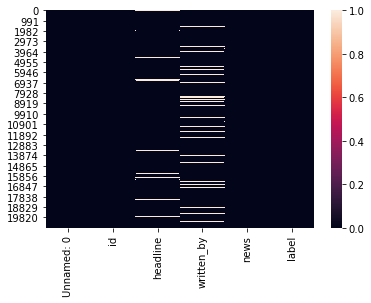

In [7]:
# ploting null values by heatmap

sns.heatmap(df.isnull())
plt.show()

In [8]:
# drop unnamed and id column which have no use for data Analysing

df.drop(['Unnamed: 0','id'],axis=1,inplace=True)
df.head(2)

headline  \
0  Ethics Questions Dogged Agriculture Nominee as Georgia Governor - The New York Times   
1              U.S. Must Dig Deep to Stop Argentina’s Lionel Messi - The New York Times   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [9]:
# replace null values with 'None'
df['news']=df['news'].replace(np.nan,'none')
df['news'].isnull().sum()

0

In [10]:
# convert all text into lowercase

df['news']=df['news'].apply(lambda x: x.lower())
df['news'].head(2)

0    washington  —   in sonny perdue’s telling, georgians were growing weary of the corruption and scandals in their state when he took over as governor in 2003  —   a time when he gave his own version of a “drain the swamp” pledge. “my first goal as governor is to restore public trust in state government by changing the culture of state government,” mr. perdue told a leadership conference at kennesaw state university in april 2003. “our form of government depends on a mutual bond of trust between the people and their government. but people have become cynical about their government. ” but mr. perdue, a republican who is awaiting confirmation to serve as president trump’s agriculture secretary, became a target of frequent criticism that he was failing to honor his own ethics pledge during his eight years as governor. the criticism centers on the fact that, as mr. trump has, he continued to own or help run his family business ventures  —   four   companies  —   while serving as governor

In [11]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

df['news'] = df['news'].apply(punctuation_removal)

In [12]:
#check
df['news'].head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [13]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['news'] = df['news'].apply(lambda x: ' '.join([word for word in x.split() 
                                                  if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# checking common words
freq = pd.Series(' '.join(df['news']).split()).value_counts()[:20]
print(freq)

# common word removing
freq = list(freq.index)
df['news']=df['news'].apply(lambda x: " ".join(x for x in x.split() 
                                               if x not in freq))


said         79931
mr           66051
”            48164
—            47096
trump        43702
would        37013
one          36653
people       33923
new          29660
like         25694
also         25367
us           24752
president    22909
clinton      22132
time         19863
could        19178
many         18958
even         18564
state        18397
years        17415
dtype: int64


In [15]:
# see rarely use words
freq=pd.Series(''.join(df['news']).split()).value_counts()[-20:]
print(freq)

# removing rarely use words
freq=list(freq.index)

df['news']=df['news'].apply(lambda x: ' '.join(x for x in x.split() 
                                               if x not in freq))


2795video          1
aty                1
насаждают          1
hamm’s             1
“her”—             1
versorgung         1
grober             1
restin             1
winera             1
watergenerating    1
sharepart          1
shareleft          1
oledдисплей        1
mash”              1
isola              1
hazelbaker         1
‘instant           1
hoitytoity         1
“assumed           1
скорого            1
dtype: int64


## Data Exploration

1    10413
0    10387
Name: label, dtype: int64


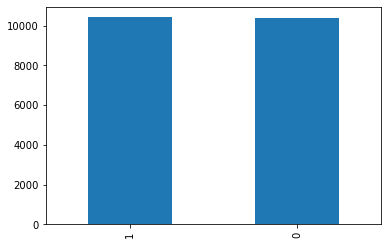

In [16]:
# How many fake and real articles?
print(df['label'].value_counts())
df['label'].value_counts().plot(kind="bar")
plt.show()

In [17]:
pip install wordcloud

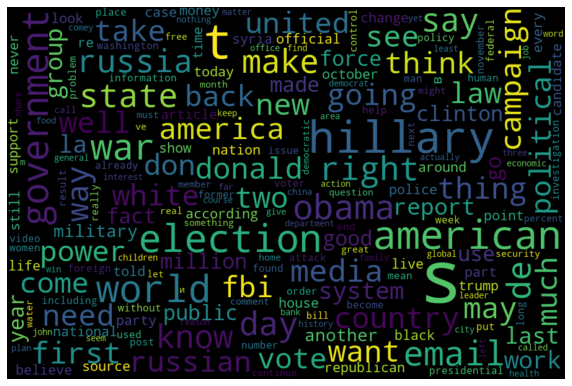

In [18]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = df[df["label"] == 1]
all_words = ' '.join([news for news in fake_data.news])

wordcloud = WordCloud(width= 900, height= 600,
                          max_font_size = 120,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


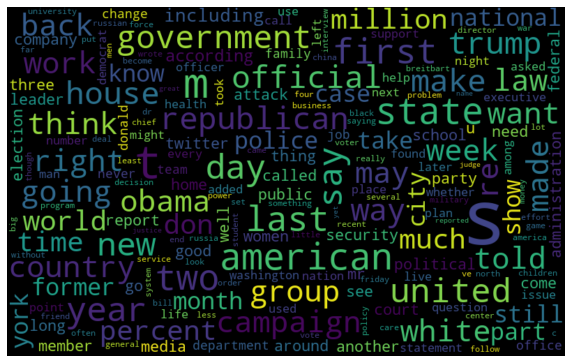

In [19]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = df[df["label"] == 0]
all_words = ' '.join([news for news in real_data.news])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


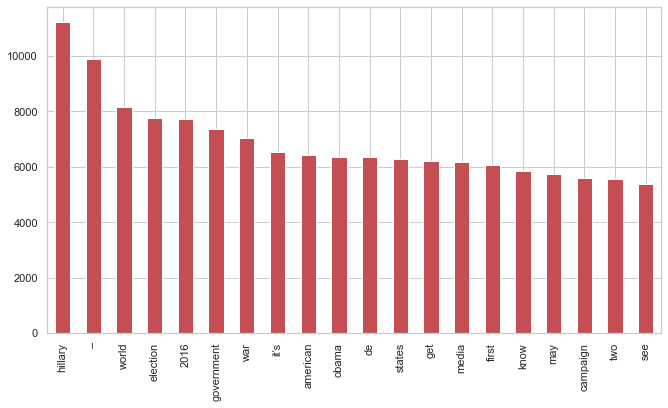

In [20]:
# Most frequent words in fake news
sns.set(style=('whitegrid'))
fake_df=df[df['label'] == 1]
plt.figure(figsize=(11,6))
pd.Series(' '.join(fake_df['news']).split()).value_counts()[:20].plot(kind='bar',color='r')
plt.show()

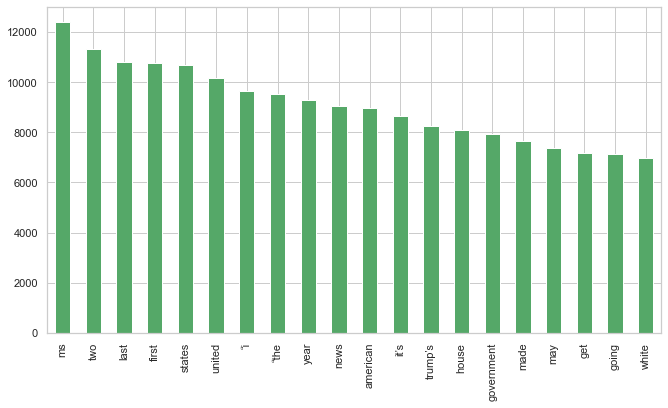

In [21]:
# Most frequent words in real news
real_df=df[df['label'] == 0]
plt.figure(figsize=(11,6))
pd.Series(' '.join(real_df['news']).split()).value_counts()[:20].plot(kind='bar',color='g')
plt.show()

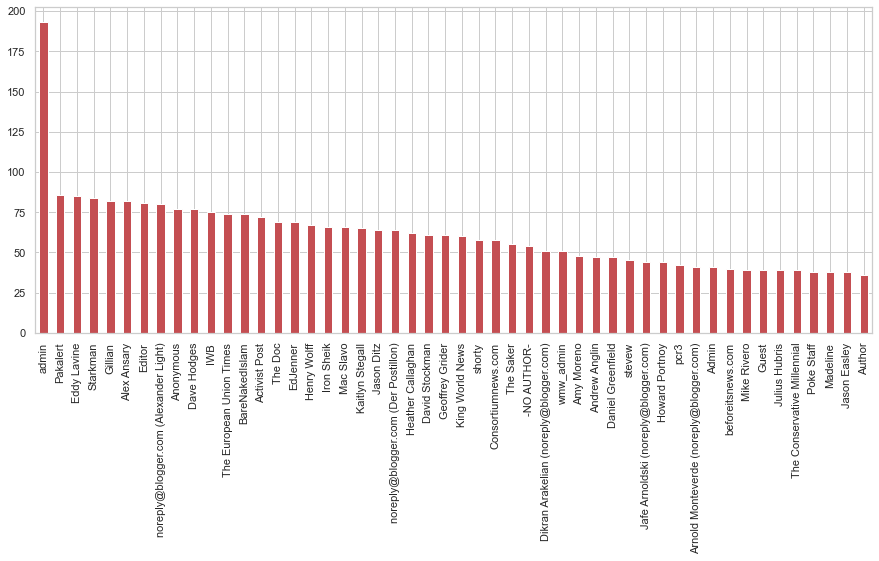

In [22]:
# top 50 fake news writters in this data

plt.figure(figsize=(15,6))
fake_df=df[df['label'] == 1]
fake_df['written_by'].value_counts()[:50].plot(kind='bar',color='r')
plt.show()

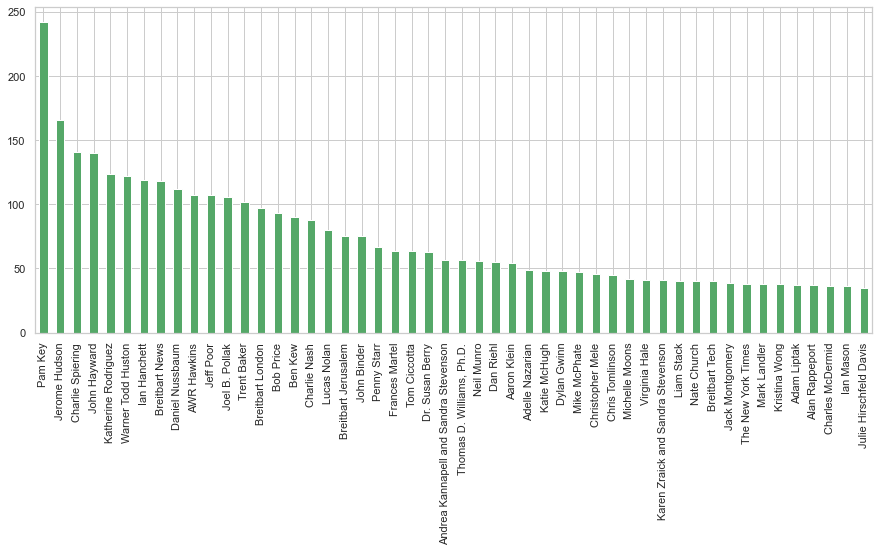

In [23]:
# top 50 real news writters in this data

plt.figure(figsize=(15,6))
real_df=df[df['label'] == 0]
real_df['written_by'].value_counts()[:50].plot(kind='bar',color='g')
plt.show()

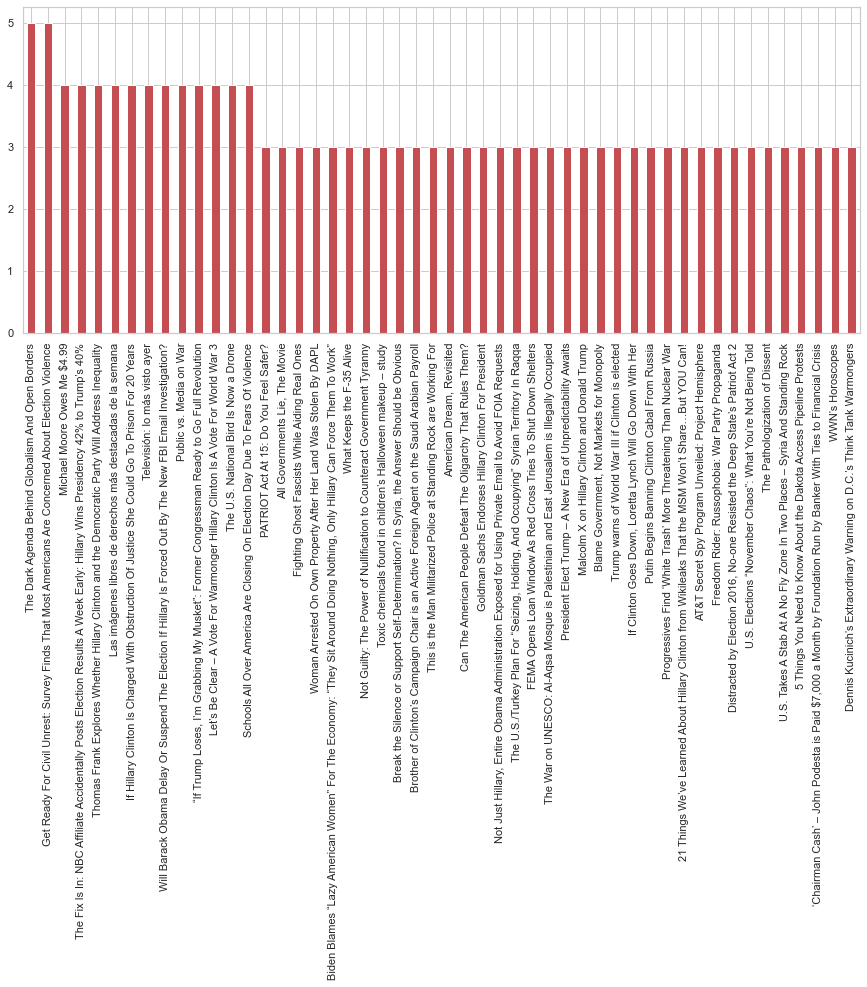

In [24]:
# top 50 fake news headline

plt.figure(figsize=(15,6))
fake_df=df[df['label'] == 1]
fake_df['headline'].value_counts()[:50].plot(kind='bar',color='r')
plt.show()

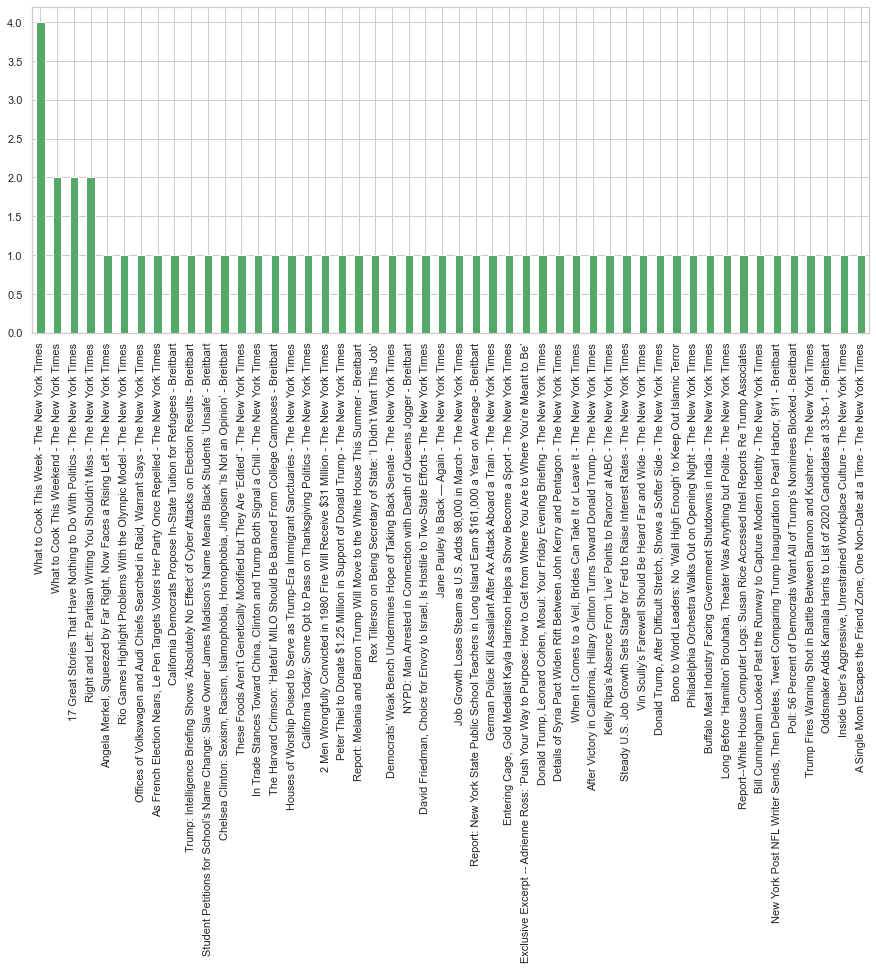

In [25]:
# top 50 real news headline

plt.figure(figsize=(15,6))
real_df=df[df['label'] == 0]
real_df['headline'].value_counts()[:50].plot(kind='bar',color='g')
plt.show()

# Model Training

In [26]:
# splitiing data into train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df['news'],df['label'],test_size=0.23,random_state=42)

## Logistic Regression

accuracy: 95.26%
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2381
           1       0.95      0.95      0.95      2403

    accuracy                           0.95      4784
   macro avg       0.95      0.95      0.95      4784
weighted avg       0.95      0.95      0.95      4784



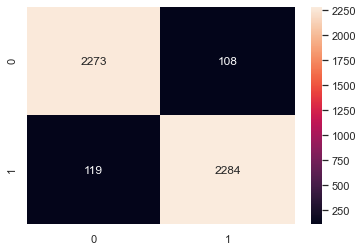

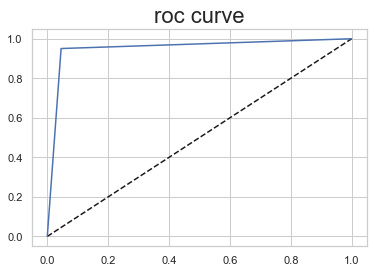

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_curve

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(x_train, y_train)

# Accuracy
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(classification_report(y_test,prediction))

cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True,fmt='0')
plt.show()

# roc_curve
fpr,tpr,thresholds=roc_curve(y_test,prediction)
plt.plot([0,1],[0,1],'--k')
plt.plot(fpr,tpr,label='logistic_regression')
plt.title('roc curve',fontsize=22)
plt.show()

# Decision Tree 

accuracy: 85.83%
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2381
           1       0.85      0.87      0.86      2403

    accuracy                           0.86      4784
   macro avg       0.86      0.86      0.86      4784
weighted avg       0.86      0.86      0.86      4784



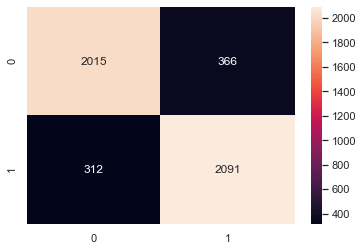

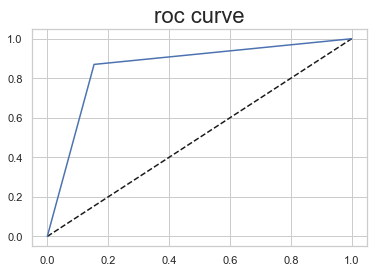

In [28]:
# Vectorizing and applying TF-IDF
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier())])

# Fitting the model
model = pipe.fit(x_train, y_train)

# Accuracy
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(classification_report(y_test,prediction))

cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True,fmt='0')
plt.show()

# roc_curve
fpr,tpr,thresholds=roc_curve(y_test,prediction)
plt.plot([0,1],[0,1],'--k')
plt.plot(fpr,tpr,label='logistic_regression')
plt.title('roc curve',fontsize=22)
plt.show()

## Random Forest 

accuracy: 90.49%
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2381
           1       0.94      0.87      0.90      2403

    accuracy                           0.90      4784
   macro avg       0.91      0.91      0.90      4784
weighted avg       0.91      0.90      0.90      4784



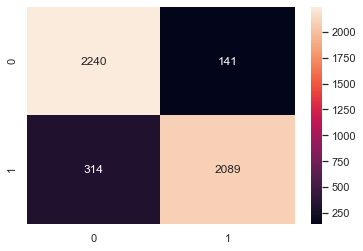

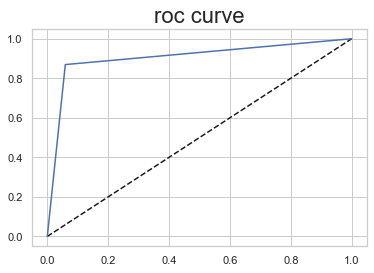

In [29]:
# Vectorizing and applying TF-IDF
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])

# Fitting the model
model = pipe.fit(x_train, y_train)

# Accuracy
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(classification_report(y_test,prediction))

cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True,fmt='0')
plt.show()

# roc_curve
fpr,tpr,thresholds=roc_curve(y_test,prediction)
plt.plot([0,1],[0,1],'--k')
plt.plot(fpr,tpr,label='logistic_regression')
plt.title('roc curve',fontsize=22)
plt.show()

## AdaBoost Classifier

accuracy: 92.1%
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2381
           1       0.91      0.93      0.92      2403

    accuracy                           0.92      4784
   macro avg       0.92      0.92      0.92      4784
weighted avg       0.92      0.92      0.92      4784



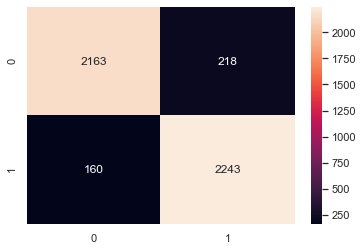

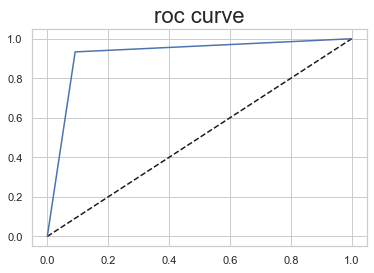

In [30]:
# Vectorizing and applying TF-IDF
from sklearn.ensemble import AdaBoostClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', AdaBoostClassifier())])

# Fitting the model
model = pipe.fit(x_train, y_train)

# Accuracy
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(classification_report(y_test,prediction))
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True,fmt='0')
plt.show()

# roc_curve
fpr,tpr,thresholds=roc_curve(y_test,prediction)
plt.plot([0,1],[0,1],'--k')
plt.plot(fpr,tpr,label='logistic_regression')
plt.title('roc curve',fontsize=22)
plt.show()

accuracy: 95.26%
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2381
           1       0.95      0.95      0.95      2403

    accuracy                           0.95      4784
   macro avg       0.95      0.95      0.95      4784
weighted avg       0.95      0.95      0.95      4784

Score: 0.9761488511488512


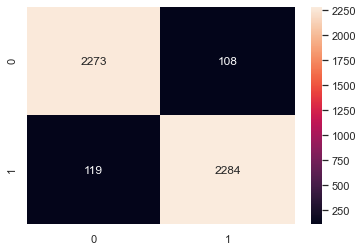

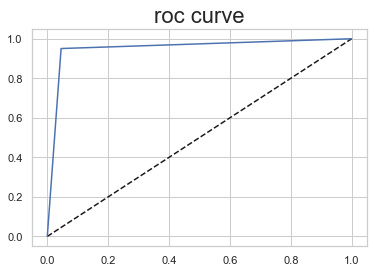

In [33]:
### select best model= logistic Regression
# Vectorizing and applying TF-IDF
pipe_lg = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe_lg.fit(x_train, y_train)

# Accuracy
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(classification_report(y_test,prediction))
print("Score:",pipe_lg.score(x_train,y_train))

cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True,fmt='0')
plt.show()

# roc_curve
fpr,tpr,thresholds=roc_curve(y_test,prediction)
plt.plot([0,1],[0,1],'--k')
plt.plot(fpr,tpr,label='logistic_regression')
plt.title('roc curve',fontsize=22)
plt.show()

In [34]:
# saving the best model

import joblib

joblib.dump(pipe_lg,"fake_news_prediction.pkl")

['fake_news_prediction.pkl']